In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import functions as fn

# Part a) Ordinary Least Squares on the data set

### Perform a OLS regression using polynomials in x and y up to fifth order. 
### Find the confidence interval nof the estimators $\beta$
### Use the MSE- and R2 score functions.  
### Scaling of the data, split of the data. 

In [43]:
# Initializing the data
x, y, z = fn.init_data(30,0.1)

# Creating the design matrix
X = fn.create_X(x, y, n=5)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=0.2)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

The MSE for the prediciton is:
0.010703005106051213 

The R2 for the prediciton is:
0.8798131198494169 



## Beta coefficents and their 95% confidence intervals

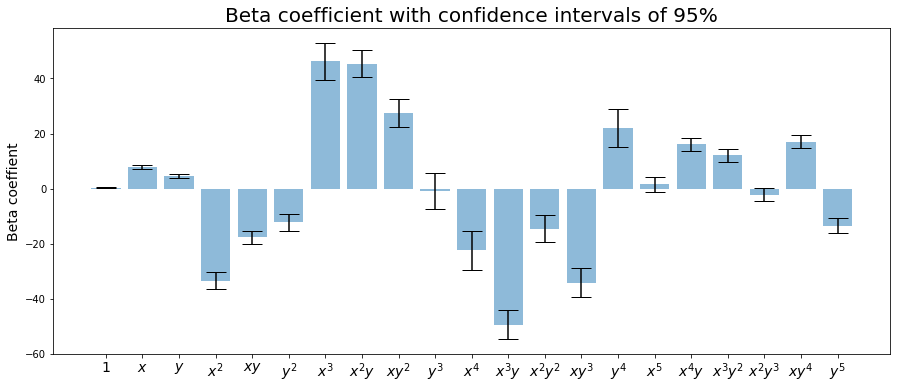

In [44]:
# Calculating the variance
betavariance = np.sqrt(np.diagonal(XTXinv)*np.var(z_train-z_tilde))

# Plotting the figure
fig, ax = plt.subplots(figsize=(15,6))

labels= ['1','$x$','$y$','$x^2$','$xy$','$y^2$','$x^3$','$x^2y$','$xy^2$','$y^3$','$x^4$',
         '$x^3y$','$x^2y^2$','$xy^3$','$y^4$','$x^5$','$x^4y$','$x^3y^2$','$x^2y^3$','$xy^4$','$y^5$']


x_pos = np.arange(len(OLSbeta))
ax.bar(x_pos, OLSbeta, yerr=2*betavariance, alpha=0.5,capsize=10)
ax.set_ylabel('Beta coeffient', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=14)
ax.set_title('Beta coefficient with confidence intervals of 95%', fontsize=20)

plt.show()

# Part b): Bias-variance trade-off and resampling techniques.

### Make a figure similar to Fig. 2.11 of Hasties, et al., with only the testing and training MSEs.
### Show that the cost function
### $C(\mathbf{X}, \mathbf{\beta}) = \frac{1}{n}\sum_{i=0}^{n-1}(y_i -\tilde{y_i})^2 = \mathbb{E}[(\mathbf{y}-\mathbf{\tilde{y}})^2] $
### can be rewritten as 
### $\mathbb{E}[(\mathbf{y}-\mathbf{\tilde{y}})^2] = \frac{1}{n}\sum_{i} (f_i -\mathbb{E}[\mathbf{\tilde{y}}])^2 +  \frac{1}{n}\sum_{i}(y_i -\mathbb{E}[\mathbf{\tilde{y}}])^2 + \sigma^2$

### Explain the terms, which one is bias and variance and their interpretations

### Perform bias variance tradeoff with increasing polynomials (model complexity) and number of data points, and bootstrap resampling methods on the training and testing data

# Computing the expectance of the train and test error for increasing complexity over 300 different runs

In [41]:
# Initializing the data parameters
N = 30
noisefactor = 0.3
test_size = 0.2
n =  15
iterations = 20

# Creating arrays for train and test error
TrainError = np.zeros(n)
TestError = np.zeros(n)



# Initializing the data
x, y, z = fn.init_data(N, noisefactor)

# Calculating Test and Training error over many iterations to get the expected value of train and test error.
for k in range(iterations):
    for i in range(n):
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Estimating the Ordinary Least Squares Beta Matrix
        # Inverting XTX matrix with SVD to avoid singular matrix
        OLSbeta = fn.SVDinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)


        # Making the prediciton
        z_tilde = X_train @ OLSbeta
        z_predict = X_test @ OLSbeta
        
        
        """
        # Plotting the nth prediction on [0,1]x[0,1]
        z_total = fn.create_X(x, y, i) @ OLSbeta
        z_total = z_total.reshape(x.shape)
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        surf = ax.plot_surface(x, y, z_total, cmap=cm.coolwarm,
                                linewidth=0, antialiased=False)


        # Customize the z axis.
        ax.set_zlim(-0.10, 1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)

        plt.show()
        """
        
        # Computing the mean errors
        TrainError[i] += fn.MSE(z_train, z_tilde)/iterations
        TestError[i] += fn.MSE(z_test, z_predict)/iterations
    


In [ ]:
z_total = fn.create_X(x,y,n-1) @ OLSbeta
z_total = z_total.reshape(x.shape)
        


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z_total, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)


# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

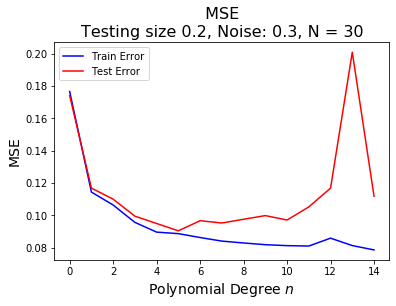

In [42]:
startpoint = 0
endpoint = 20

plt.plot(np.arange(n)[startpoint:endpoint],TrainError[startpoint:endpoint],'b' ,label='Train Error')
plt.plot(np.arange(n)[startpoint:endpoint],TestError[startpoint:endpoint],'r' ,label='Test Error')
plt.xlabel('Polynomial Degree $n$', fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.title(" MSE \nTesting size {0}, Noise: {1}, N = {2}".format( test_size, noisefactor, N), fontsize=16)

plt.legend()

## Perform bias variance tradeoff with increasing polynomials (model complexity) and number of data points, and bootstrap resampling methods on the training and testing data

### Incorporating bootstrap techniques

In [11]:
# Data Parameters
N = 30
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z=z.ravel()


# Intializing error bias and variance
error = np.zeros(n)
bias = np.zeros(n)
variance = np.zeros(n)

# Bootstrap parameters
n_bootstraps = 50

for i in range(n):
    # Creating design matrix, splitting and scaling
    X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

    # Setting up the array for the bootstrapped predictions
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    
    for j in range(n_bootstraps):
        x_, z_  = fn.Shuffle_Data(X_train, z_train)
        OLSbeta = fn.SVDinv(x_.T.dot(x_)).dot(x_.T).dot(z_) 
        z_pred[:,j] = X_test @ OLSbeta 

    #Reshaping
    z_test = z_test.reshape(len(z_test),1)
    
    error[i], bias[i], variance[i] = fn.ErrBiasVar(z_test, z_pred)

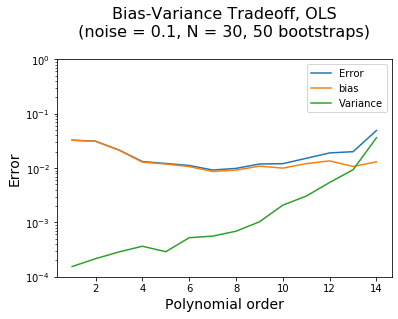

In [12]:
startpoint = 1
endpoint = 15


plt.plot(np.arange(n)[startpoint:endpoint], error[startpoint:endpoint], label='Error')
plt.plot(np.arange(n)[startpoint:endpoint], bias[startpoint:endpoint], label='bias')
plt.plot(np.arange(n)[startpoint:endpoint], variance[startpoint:endpoint], label='Variance')
plt.legend()

plt.yscale("log")
plt.ylabel("Error", fontsize=14)
plt.xlabel("Polynomial order",  fontsize=14)
plt.title("Bias-Variance Tradeoff, OLS\n (noise = {0}, N = {1}, {2} bootstraps) \n".format(noisefactor, N, n_bootstraps), fontsize =16)
plt.savefig("BootstrapBiasVariance.png", dpi=100)
plt.ylim((0.0001,1))
plt.show()


# c) Cross-Validation as resampling techniques, adding more complexity.

In [21]:
# Data Parameters
N = 30
noisefactor = 0.1
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z = z.ravel()


# CV fold parameters 
folds = 5


# Intializing error bias and variance
error = np.zeros(n)
bias = np.zeros(n)
variance = np.zeros(n)


for i in range(n):
    # Creating design matrix for polynomial degree n
    X = fn.create_X(x,y,i)

    # Setting up the array for the k fold predictions
    foldsize = np.int(N**2/folds)        
    z_pred = np.empty((foldsize, folds))

    # Shuffling the dataset
    X, z = fn.Shuffle_Data(X,z,replacement=False)    #replacement = false means not resampling the same point twice.
    foldmask = fn.k_foldsplit(len(X),folds)

    for j in range(folds):
        X_train, z_train = X[foldmask[:,j]] , z[foldmask[:,j]]
        X_test , z_test = X[~foldmask[:,j]] , z[~foldmask[:,j]]
        #z_train = z[foldmask[:,j]]
        #z_test  = z[~foldmask[:,j]]

        # Standard scaling (subtracting the mean)
        X_train, X_test = fn.Scaling(X_train, X_test)

        # Fitting model and predicting
        OLSbeta = fn.SVDinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train) 
        z_pred[:,j] = X_test @ OLSbeta

    #Reshaping
    z_test = z_test.reshape(len(z_test),1)


    error[i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
    bias[i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance[i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

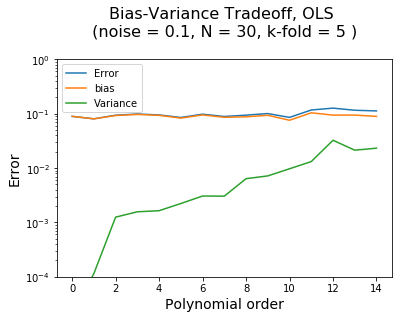

In [22]:
startpoint = 0
endpoint = 15


plt.plot(np.arange(n)[startpoint:endpoint], error[startpoint:endpoint], label='Error')
plt.plot(np.arange(n)[startpoint:endpoint], bias[startpoint:endpoint], label='bias')
plt.plot(np.arange(n)[startpoint:endpoint], variance[startpoint:endpoint], label='Variance')
plt.legend()
plt.ylabel("Error", fontsize=14)
plt.xlabel("Polynomial order",  fontsize=14)
plt.title("Bias-Variance Tradeoff, OLS \n (noise = {0}, N = {1}, k-fold = {2} ) \n".format(noisefactor, N, folds), fontsize =16)
#plt.savefig("kFoldbiasVaraiance.png", dpi=100)
plt.yscale("log")
plt.ylim((0.0001,1))

plt.show()


# d) Ridge Regression on the Franke funcion with resampling

### Perform Ridge Regression with either matrix inversion or SVD.
### Use bootstrap for the same polynomial range as in b), and cross-valdiation as in c), but plotted for different values of $\lambda$

### Bootstrapping:

In [34]:
# Data Parameters
N = 30
noisefactor = 0.3
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)


# Lambda
lamb = 10**np.linspace(-5,3,9)

# Bootstrap parameters
n_bootstraps = 100


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))



for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0]))).dot(x_.T).dot(z_) 

            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
        bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0
Lamdba equals 1000.0


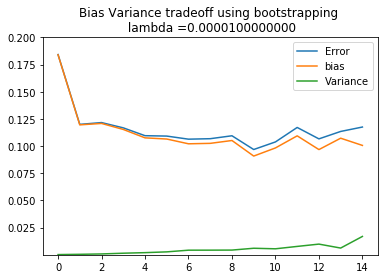

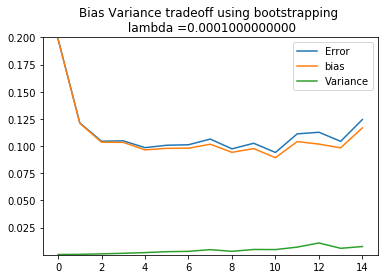

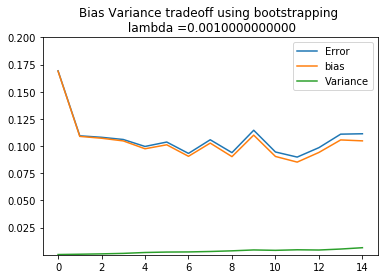

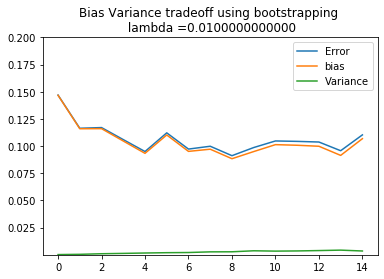

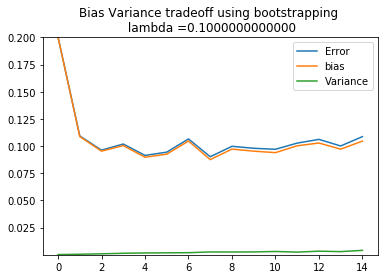

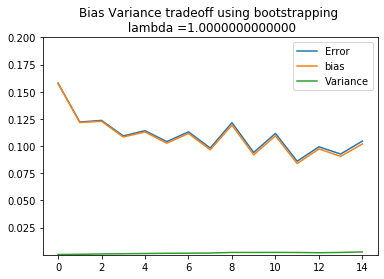

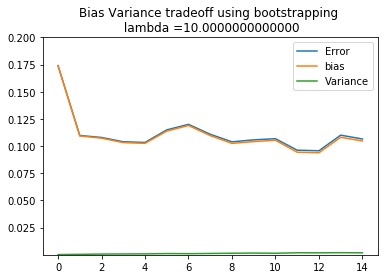

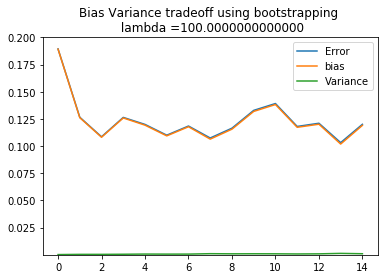

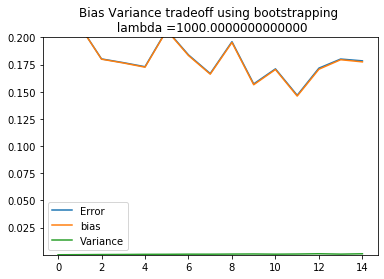

In [37]:
startpoint = 0
endpoint = 15

for k in range(len(lamb)):
    

    plt.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], label='Error')
    plt.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], label='bias')
    plt.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], label='Variance')
    plt.title("Bias Variance tradeoff using bootstrapping \n lambda =%.13f" % lamb[k])
    plt.legend()
    #plt.yscale("log")
    plt.ylim(0.00001, 0.2)
    plt.show()

## k fold cross validation

In [ ]:
# Data Parameters
N = 30
noisefactor = 0.3
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z = z.ravel()

# penalty term
lamb = np.logspace(-8,0,9)

# CV fold parameters 
folds = 5


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))


for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
        # Creating design matrix for polynomial degree n
        X = fn.create_X(x,y,i)
        
        # Setting up the array for the k fold predictions
        foldsize = np.int(N**2/folds)        
        z_pred = np.empty((foldsize, folds))
        
        # Shuffling the dataset
        X, z = fn.Shuffle_Data(X,z,replacement=False)    #replacement = false means not resampling the same point twice.
        foldmask = fn.k_foldsplit(len(X),folds)
        
        for j in range(folds):
            X_train, z_train = X[foldmask[:,j]] , z[foldmask[:,j]]
            X_test , z_test = X[~foldmask[:,j]] , z[~foldmask[:,j]]
            #z_train = z[foldmask[:,j]]
            #z_test  = z[~foldmask[:,j]]
            
            # Standard scaling (subtracting the mean)
            X_train, X_test = fn.Scaling(X_train, X_test)
            
            # Fitting model and predicting
            RIDGEbeta = fn.SVDinv(X_train.T.dot(X_train)+lamb[k]*np.eye(len(X_train[0]))).dot(X_train.T).dot(z_train) 
            z_pred[:,j] = X_test @ RIDGEbeta

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
        bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

In [ ]:

startpoint = 0
endpoint = 15

for k in range(len(lamb)):
    

    plt.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], label='Error')
    plt.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], label='bias')
    plt.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], label='Variance')
    plt.title("Bias-Variance Tradeoff, Ridge \n (noise = {0}, N = {1}, k-fold = {2} ) \n $\lambda$ = {3}".format(noisefactor, N, folds, lamb[k]), fontsize =16)
    plt.legend()
    plt.yscale("log")

    plt.ylim(0.0001, 0.5)
    plt.show()


# e) Lasso Regression on the Franke function with resampling

### Perform Lasso Regression with Scikit-Learn.
### Use bootstrap for the same polynomial range as in b), and cross-valdiation as in c), but plotted for different values of $\lambda$
### Give a critical discussion of the three methods and a judgement of which model fits the data best.

In [48]:
from sklearn import linear_model
# Data Parameters
N = 30
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)

# Lambda
lamb = np.logspace(-5,0,6)
# Bootstrap parameters
n_bootstraps = 10

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))

    for i in range(n):
        print("n equals {}".format(i))
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)

            # Lasso regression
            clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False, max_iter=10000, tol=0.01)
            clf.fit(x_, z_)
            LASSObeta = clf.coef_
            z_pred[:,j] = X_test @ LASSObeta 
        
        x_pos = np.arange(len(LASSObeta))
        ax.bar(x_pos, LASSObeta, alpha=0.5,capsize=10)
        ax.set_ylabel('Beta coeffient', fontsize=14)
        ax.set_xticks(x_pos)
        #ax.set_xticklabels(labels, fontsize=14)
        ax.set_title("lasso beta", fontsize=20)

        plt.show()
        
        
        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
        bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
        
        

Lamdba equals 1e-05
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.827224084537463, tolerance: 1.647183456224456
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8567262895454, tolerance: 1.7269432508794722
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.715273664201081, tolerance: 1.873325562134101
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective d

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9957025558231, tolerance: 2.0972214725105585
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.764049436352484, tolerance: 1.892959409665313
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8274124094879625, tolerance: 1.9582145567635143
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4948653522688486, tolerance: 1.7321617202619664
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.77822101006895, tolerance: 1.83820798902599
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9235639473858273, tolerance: 1.9678865189602273
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.419246968879575, tolerance: 1.7794807877966992
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.410281685162505, tolerance: 1.6249535393718966
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.249902437668494, tolerance: 1.7504121477866996
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3195894249722455, tolerance: 1.842113725503508
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.24548413753767, tolerance: 1.8566613867634791
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.071352693701519, tolerance: 1.820542212030837
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.568642388115262, tolerance: 1.762365359768926
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4735275477506993, tolerance: 1.8319220559988134
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5104183076255313, tolerance: 1.6638471918700466
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.133769780798911, tolerance: 1.720305497626256
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.760576037249891, tolerance: 1.7591725193899665
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.273495933639345, tolerance: 1.8329443386692925
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6689072646254237, tolerance: 1.829654930030012
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7419876245374093, tolerance: 1.8836478259209322
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1431146131581045, tolerance: 1.9459779116411091
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.714897501354769, tolerance: 1.825335018084773
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6321287248830223, tolerance: 1.6230890871315757
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.446047574659463, tolerance: 1.802631305318269
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5596736225492434, tolerance: 1.7664652235346188
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5263826902894024, tolerance: 1.6739346764543488
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8403158520763, tolerance: 1.701476843272933
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.450123060901239, tolerance: 1.8620369669694963
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7095050372689062, tolerance: 1.9631827476896515
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6419450703560377, tolerance: 2.0016301138983392
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

Lamdba equals 0.0001
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.001
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.01
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.1
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 1.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14


In [ ]:
from matplotlib import rcParams, cycler

startpoint = 0
endpoint = 15
fig, ax = plt.subplots(figsize=(15,6))

for k in range(len(lamb)):
    """
    ax.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], 
            label='Error,  $\lambda$ = {}'.format(lamb[k]))
    ax.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], linestyle='--',
            label='Bias, $\lambda$ = {}'.format(lamb[k]))
    """
    ax.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], linestyle='dashdot', 
            label='Variance, $\lambda$ = {}'.format(lamb[k]))

plt.yscale("log")

plt.ylabel("Error", fontsize=12)
plt.xlabel("Polynomial order",  fontsize=12)
cmap=plt.get_cmap('Paired')
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(lamb))))



#plt.savefig("LassoRegression.png", dpi=100)
plt.legend(loc=5)
plt.show()

Text(0.5, 15.0, '$\\lambda$')

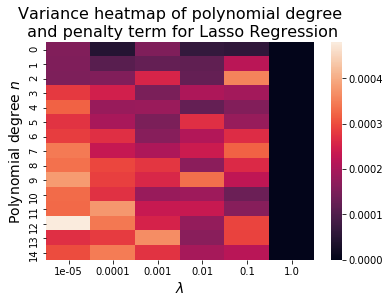

In [6]:
import seaborn as sns
ax = sns.heatmap(variance.T, xticklabels=lamb)
ax.set_title('Variance heatmap of polynomial degree\n and penalty term for Lasso Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

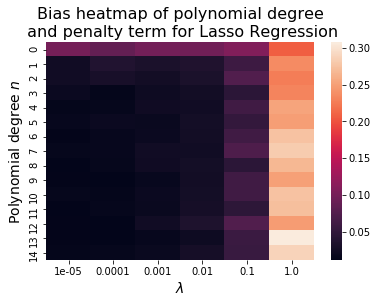

In [7]:
import seaborn as sns
ax = sns.heatmap(bias.T, xticklabels=lamb)
ax.set_title('Bias heatmap of polynomial degree\n and penalty term for Lasso Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

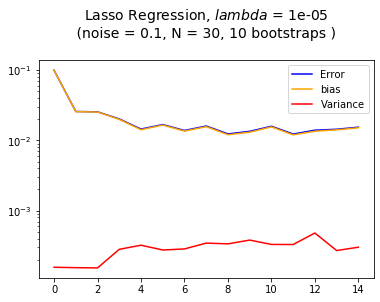

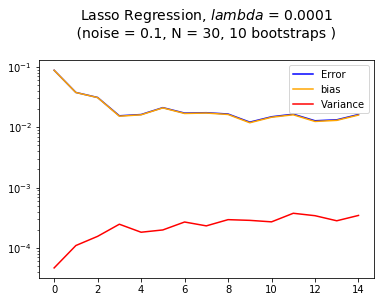

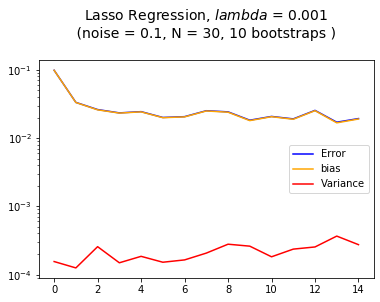

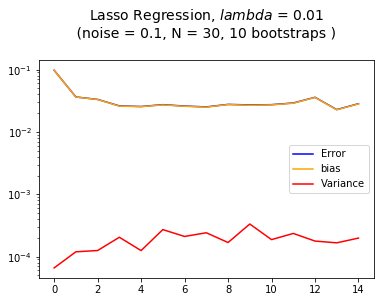

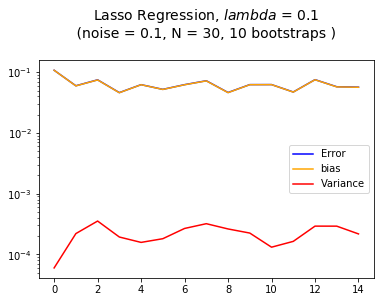

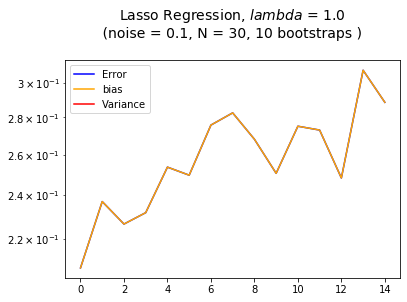

In [8]:
startpoint = 0
endpoint = 15
for k in range(len(lamb)):
    plt.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], color='blue', label='Error')
    plt.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], color = 'orange', label='bias')
    plt.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], color ='red', label='Variance')
    plt.title("Lasso Regression, $lambda$ = {0}\n (noise = {1}, N = {2}, {3} bootstraps ) \n".format(lamb[k], noisefactor, N, n_bootstraps), fontsize =14)
    plt.legend()
    plt.yscale("log")

    plt.show()

## k-fold cross validation

In [ ]:
# Data Parameters
N = 30
noisefactor = 0.3
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z = z.ravel()

# penalty term
lamb = np.logspace(-8,0,9)

# CV fold parameters 
folds = 10


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))


for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
        # Creating design matrix for polynomial degree n
        X = fn.create_X(x,y,i)
        
        # Setting up the array for the k fold predictions
        foldsize = np.int(N**2/folds)        
        z_pred = np.empty((foldsize, folds))
        
        # Shuffling the dataset
        X, z = fn.Shuffle_Data(X,z,replacement=False)    #replacement = false means not resampling the same point twice.
        foldmask = fn.k_foldsplit(len(X),folds)
        
        for j in range(folds):
            X_train, z_train = X[foldmask[:,j]] , z[foldmask[:,j]]
            X_test , z_test = X[~foldmask[:,j]] , z[~foldmask[:,j]]
            #z_train = z[foldmask[:,j]]
            #z_test  = z[~foldmask[:,j]]
            
            # Standard scaling (subtracting the mean)
            X_train, X_test = fn.Scaling(X_train, X_test)
            
            # Fitting model and predicting
            clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False, max_iter=500, tol=0.001)
            clf.fit(X_train, z_train)
            LASSObeta = clf.coef_
            z_pred[:,j] = X_test @ LASSObeta

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
        bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

In [ ]:
startpoint = 0
endpoint = 15

for k in range(len(lamb)):
    

    plt.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], label='Error')
    plt.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], label='bias')
    plt.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], label='Variance')
    plt.title("Bias Variance tradeoff using k-fold Cross Validation \n lambda =%.13f" % lamb[k])
    plt.legend()
    
    #plt.ylim(-0.01, 0.5)
    plt.show()

# f) Introducing real data and preparing the data analysis

### Get data from dta folder of project 1. 

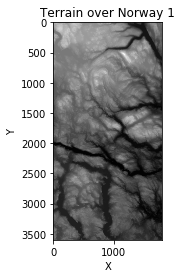

In [49]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Load the terrain
terrain1 = imread("SRTM_data_Norway.tif")
# Show the terrain
plt.figure()
plt.title("Terrain over Norway 1")
plt.imshow(terrain1, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [50]:
# Initializing the data
N = 500
x_start = 2000
y_start = 600
x,y,z = fn.terrainInit("SRTM_data_Norway.tif", x_start, y_start, N)


plt.imshow(z, cmap="gray")

TypeError: terrainInit() missing 1 required positional argument: 'y_end'

In [ ]:
def terrain_sampling(x,y,z):
    """
    Samples down the terrain data to fit the length of x and y,
    effectively reducing the resolution of the data.
    """
    z_sample = np.zeros((len(x),len(y)))
    zx, zy = z.shape
    
    for i in range(len(x)):
        for j in range(len(y)):
            z_sample[i,j] = z[np.int(zx/len(x))*i, np.int(zy/len(y))*j]
    return z_sample

In [ ]:
z = terrain_sampling(x,y,z)

In [ ]:
z

In [ ]:
from imageio import imread
terrain1 = imread("SRTM_data_Norway.tif")
x_start, x_end = 2000,2500
y_end, y_end = 600,1100

z = np.array(terrain1[x_start:x_end, y_start:y_end])

In [ ]:
z[np.int(500/50)*np.arange(50), np.int(500/50)*np.arange(50)].shape

# g) OLS, Ridge and Lasso regression with resampling

### Apply all three methods on the terrain data, with the same polynomial approximation and cross-validation as resampling technique to evaluate which model fits the data best.
### "Present a critical evaluation of your results and disucss the applicability of these regreesion methods to the type of the data presented here (either the terrain data we propose or other data sets)."

# OLS:

In [2]:
# Initializing the data
N = 30
noisefactor = 0.1
test_size = 0.2
n =  15


# Collecting the data
x_start, x_end = 2000,2500
y_start, y_end = 600,1100
z = fn.terrainInit("SRTM_data_Norway.tif", x_start, y_start,y_end, y_end)

# Reducing the resolution of the data down to N x N datapoints.
x, y = np.linspace(0,1,N), np.linspace(0,1,N)
z = fn.terrain_sampling(x,y,z)
x,y = np.meshgrid(x,y)

# Creating arrays for train and test error
TrainError = np.zeros(n)
TestError = np.zeros(n)

for i in range(n):
    # Creating design matrix, splitting and scaling
    X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

    # Estimating the Ordinary Least Squares Beta Matrix
    # Inverting XTX matrix with SVD to avoid singular matrix
    OLSbeta = fn.SVDinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)


    # Making the prediciton
    z_tilde = X_train @ OLSbeta
    z_predict = X_test @ OLSbeta

    # Plotting the ith polynomial prediction on [0,1]x[0,1]
    z_total = fn.create_X(x,y,i) @ OLSbeta
    z_total = z_total.reshape(x.shape)
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(x, y, z_total, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

    # Computing the mean errors
    TrainError[i] = fn.MSE(z_train, z_tilde)
    TestError[i]  = fn.MSE(z_test, z_predict)



IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
startpoint = 0
endpoint = 70

plt.plot(np.arange(n)[startpoint:endpoint],TrainError[startpoint:endpoint],'b' ,label='Train Error')
plt.plot(np.arange(n)[startpoint:endpoint],TestError[startpoint:endpoint],'r' ,label='Test Error')
plt.xlabel('Polynomial Degree $n$')
plt.ylabel('MSE')
plt.title(" MSE OLS\nTesting size {0}, N= {1}".format(test_size, N))

plt.legend()

# Ridge

## Bootstrap

In [ ]:
# Data Parameters
N = 200
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x_start = 2000
y_start = 400
x, y, z = fn.terrainInit("SRTM_data_Norway.tif", x_start, y_start, N)

# Lambda
lamb = 10**np.linspace(-5,0,6)

# Bootstrap parameters
n_bootstraps = 100


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))



for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0]))).dot(x_.T).dot(z_) 

            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
        bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

In [ ]:
startpoint = 0
endpoint = 20

for k in range(len(lamb)):
    

    plt.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], label='Error')
    plt.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], label='bias')
    plt.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], label='Variance')
    plt.title("Bias Variance tradeoff using bootstrapping \n lambda =%.13f" % lamb[k])
    plt.legend()
    #plt.ylim(-0.01, 0.1)
    plt.show()

## k-fold cross validation

In [ ]:
# Data Parameters
N = 30
noisefactor = 0.1
n = 15

# Initializing the data
x_start = 2000
y_start = 400
x, y, z = fn.terrainInit("SRTM_data_Norway.tif", x_start, y_start, N)
z = z.ravel()
# Lambda
lamb = 10**np.linspace(-5,0,6)

# CV fold parameters 
folds = 5
foldsize = np.int(N**2/folds) 

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))


for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
        
        # Creating design matrix for polynomial degree n
        X = fn.create_X(x,y,i)
        
        # Setting up the array for the k fold predictions
               
        z_pred = np.empty((foldsize, folds))
        
        # Shuffling the dataset
        X, z = fn.Shuffle_Data(X,z,replacement=False)    #replacement = false means not resampling the same point twice.
        
        # Getting the index for array for the folds and the rest
        foldmask = fn.k_foldsplit(len(X),folds)
        
        for j in range(folds):
            X_train, z_train = X[foldmask[:,j]] , z[foldmask[:,j]]
            X_test , z_test = X[~foldmask[:,j]] , z[~foldmask[:,j]]
            
            # Standard scaling (subtracting the mean)
            X_train, X_test = fn.Scaling(X_train, X_test)
            
            # Fitting model and predicting
            RIDGEbeta = fn.SVDinv(X_train.T.dot(X_train)+lamb[k]*np.eye(len(X_train[0]))).dot(X_train.T).dot(z_train) 
            z_pred[:,j] = X_test @ RIDGEbeta

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
        bias[k,i]  = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[k,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

In [ ]:
startpoint = 0
endpoint = 20

for k in range(len(lamb)):
    

    plt.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], label='Error')
    plt.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], label='bias')
    plt.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], label='Variance')
    plt.title("Bias Variance tradeoff using bootstrapping \n lambda =%.13f" % lamb[k])
    plt.legend()
    #plt.ylim(-0.01, 0.1)
    plt.show()

# Lasso

## Bootstrap

## k-fold cross validation